In [ ]:
import os
import time
import requests
import sys

def retrieve_html():
    for year in range(2018, 2025):
        for month in range(1, 13):
            if month < 10:
                url = 'http://en.tutiempo.net/climate/0{}-{}/ws-421820.html'.format(month, year)
            else:
                url = 'http://en.tutiempo.net/climate/{}-{}/ws-421820.html'.format(month, year)

            try:
                response = requests.get(url)
                response.raise_for_status()
                text_utf = response.text.encode('utf-8')

                folder_path = "Data/Html_Data/{}".format(year)
                os.makedirs(folder_path, exist_ok=True)

                with open("{}/{}.html".format(folder_path, month), "wb") as output:
                    output.write(text_utf)

                print(f"✅ Saved: {folder_path}/{month}.html")
            except Exception as e:
                print(f" Failed: {url} — {e}")

    sys.stdout.flush()

start_time = time.time()
retrieve_html()
stop_time = time.time()
print("Time taken: {:.2f} seconds".format(stop_time - start_time))


✅ Saved: Data/Html_Data/2018/1.html
✅ Saved: Data/Html_Data/2018/2.html
✅ Saved: Data/Html_Data/2018/3.html
✅ Saved: Data/Html_Data/2018/4.html
✅ Saved: Data/Html_Data/2018/5.html
✅ Saved: Data/Html_Data/2018/6.html
✅ Saved: Data/Html_Data/2018/7.html
✅ Saved: Data/Html_Data/2018/8.html
✅ Saved: Data/Html_Data/2018/9.html
✅ Saved: Data/Html_Data/2018/10.html
✅ Saved: Data/Html_Data/2018/11.html
✅ Saved: Data/Html_Data/2018/12.html
✅ Saved: Data/Html_Data/2019/1.html
✅ Saved: Data/Html_Data/2019/2.html
✅ Saved: Data/Html_Data/2019/3.html
✅ Saved: Data/Html_Data/2019/4.html
✅ Saved: Data/Html_Data/2019/5.html
✅ Saved: Data/Html_Data/2019/6.html
✅ Saved: Data/Html_Data/2019/7.html
✅ Saved: Data/Html_Data/2019/8.html
✅ Saved: Data/Html_Data/2019/9.html
✅ Saved: Data/Html_Data/2019/10.html
✅ Saved: Data/Html_Data/2019/11.html
✅ Saved: Data/Html_Data/2019/12.html
✅ Saved: Data/Html_Data/2020/1.html
✅ Saved: Data/Html_Data/2020/2.html
✅ Saved: Data/Html_Data/2020/3.html
✅ Saved: Data/Html_Dat

In [ ]:
import shutil
shutil.make_archive("html_data_all", 'zip', "Data/Html_Data")

from google.colab import files
files.download("html_data_all.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import os

final_weather = []

for year in range(2018, 2025):
    for month in range(1, 13):
        try:
            file_path = f"Data/Html_Data/{year}/{month}.html"
            with open(file_path, "rb") as file:
                soup = BeautifulSoup(file, "html.parser")

            table = soup.find("table", attrs={"class": "medias mensuales numspan"})
            if not table:
                continue
            rows = table.find_all("tr")[1:]

            for row in rows:
                cols = row.find_all("td")
                if len(cols) >= 8:
                    day = cols[0].text.strip()
                    if day.isdigit():
                        temp = cols[1].text.strip()
                        dew = cols[2].text.strip()
                        humidity = cols[3].text.strip()
                        wind = cols[7].text.strip()

                        final_weather.append([f"{year}-{month:02d}-{int(day):02d}", temp, dew, humidity, wind])
        except:
            pass


df_weather = pd.DataFrame(final_weather, columns=["Date", "Temp", "Dew", "Humidity", "Wind"])
df_weather.to_csv("weather_2018_2024.csv", index=False)
print("✅ weather_2018_2024.csv created")


✅ weather_2018_2024.csv created


In [ ]:
import pandas as pd


weather_df = pd.read_csv("weather_2018_2024.csv")
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

aqi_df = pd.read_csv("Hyderabad_AQI_Dataset.csv")
aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])

merged_df = pd.merge(weather_df, aqi_df, on='Date', how='inner')

merged_df.to_csv("merged_aqi_weather.csv", index=False)
print("✅ Merged dataset saved as merged_aqi_weather.csv")


/tmp/ipython-input-4-1912738232.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])


✅ Merged dataset saved as merged_aqi_weather.csv


In [ ]:
import os
from bs4 import BeautifulSoup
import pandas as pd

base_path = "Data/Html_Data"
all_data = []

for year in range(2018, 2025):
    for month in range(1, 13):
        file_path = f"{base_path}/{year}/{month}.html"
        if not os.path.exists(file_path):
            continue

        with open(file_path, 'rb') as f:
            soup = BeautifulSoup(f, 'html.parser')

        table = soup.find("table", attrs={"class": "medias mensuales numspan"})
        if not table:
            continue

        rows = table.find_all("tr")[1:]  # Skip header

        for row in rows:
            cols = row.find_all("td")
            if len(cols) >= 10:
                try:
                    day = cols[0].text.strip()
                    date = f"{year}-{month:02d}-{int(day):02d}"
                    temp = cols[1].text.strip()
                    dew = cols[2].text.strip()
                    humidity = cols[3].text.strip()
                    wind = cols[4].text.strip()
                    pressure = cols[5].text.strip()
                    rainfall = cols[6].text.strip()
                    visibility = cols[7].text.strip()
                    cloud = cols[8].text.strip()

                    all_data.append([date, pressure, rainfall, visibility, cloud])
                except:
                    continue

columns = ['Date', 'Pressure', 'Rainfall', 'Visibility', 'Cloud']
enhanced_df = pd.DataFrame(all_data, columns=columns)

enhanced_df.to_csv("enhanced_weather.csv", index=False)
print("✅ enhanced_weather.csv saved.")

from google.colab import files
files.download("enhanced_weather.csv")


✅ enhanced_weather.csv saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

aqi_df = pd.read_csv("merged_aqi_weather.csv")
enhanced_df = pd.read_csv("enhanced_weather.csv")

aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])
enhanced_df['Date'] = pd.to_datetime(enhanced_df['Date'])


merged_full = pd.merge(aqi_df, enhanced_df, on='Date', how='inner')


merged_full.to_csv("merged_full_aqi_weather.csv", index=False)
print("✅ Merged dataset saved as merged_full_aqi_weather.csv")


from google.colab import files
files.download("merged_full_aqi_weather.csv")


✅ Merged dataset saved as merged_full_aqi_weather.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv("merged_full_aqi_weather.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.to_csv("merged_full_cleaned.csv", index=False)
print("✅ Cleaned file saved as merged_full_cleaned.csv")

✅ Cleaned file saved as merged_full_cleaned.csv


In [ ]:
from google.colab import files
files.download("merged_full_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        79
    Moderate       1.00      1.00      1.00       178
Satisfactory       1.00      1.00      1.00       242

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499

✅ Confusion Matrix:


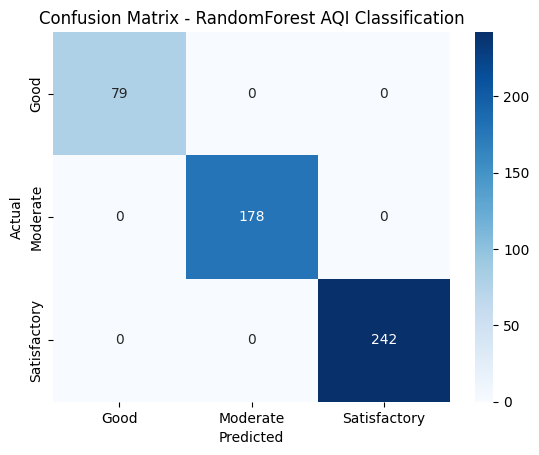

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
data = pd.read_csv("merged_full_cleaned.csv")

# 2. Drop rows with missing AQI
data = data[data['AQI'].notna()]

# 3. Define function to convert AQI values into categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

# 4. Apply categorization
data['AQI_Category'] = data['AQI'].apply(categorize_aqi)

# 5. Drop unnecessary columns
data = data.drop(columns=['AQI', 'City', 'Date'])

# 6. Separate features and target before numeric conversion
X = data.drop(columns=['AQI_Category'])
y = data['AQI_Category']

# 7. Convert only features to numeric and drop rows with NaNs
X = X.apply(pd.to_numeric, errors='coerce')
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop(columns=['AQI_Category'])
y = combined['AQI_Category']

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Train RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 10. Predictions
y_pred = clf.predict(X_test)

# 11. Evaluation
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest AQI Classification")
plt.show()


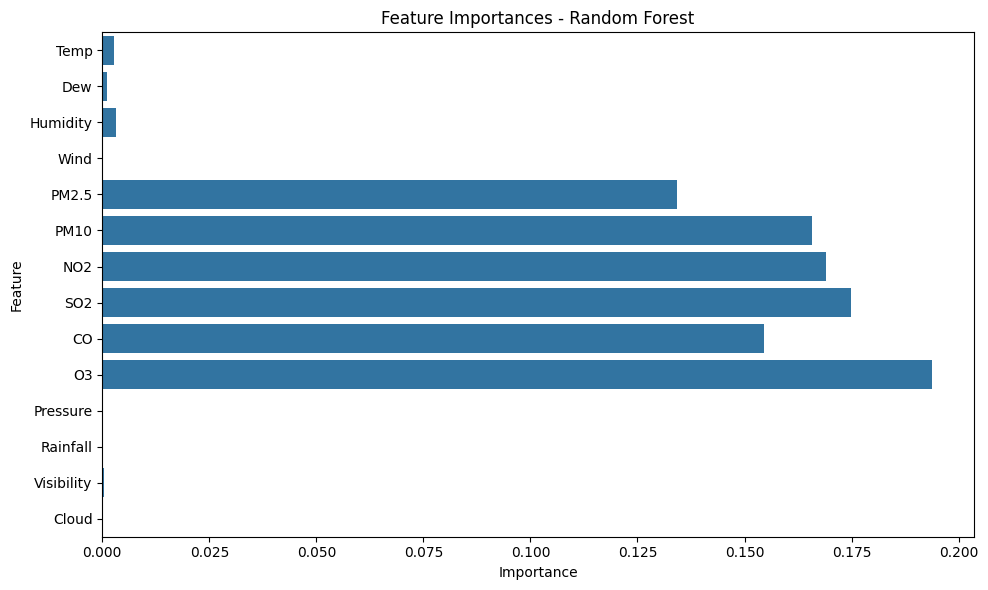

In [ ]:
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        79
    Moderate       1.00      1.00      1.00       178
Satisfactory       1.00      1.00      1.00       242

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499

✅ Confusion Matrix:


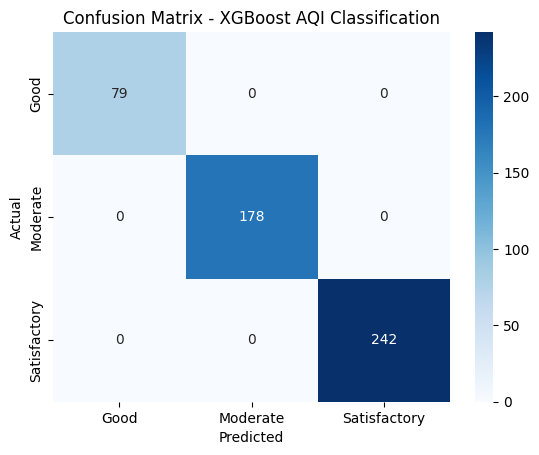

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("merged_full_cleaned.csv")


data = data[data['AQI'].notna()]


def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

data['AQI_Category'] = data['AQI'].apply(categorize_aqi)


data = data.drop(columns=['AQI', 'City', 'Date'])


features = data.drop(columns=['AQI_Category'])
features = features.apply(pd.to_numeric, errors='coerce')

# 6. Combine features and target
data = pd.concat([features, data['AQI_Category']], axis=1)
data = data.dropna()

# 7. Define features and encoded target
X = data.drop(columns=['AQI_Category'])
y = data['AQI_Category']

# 🔁 Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 9. Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# 10. Predictions
y_pred = model.predict(X_test)

# 🔁 Decode predictions for readable output
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# 11. Evaluation
print("✅ Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

print("✅ Confusion Matrix:")
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost AQI Classification")
plt.show()
